<h1>Intro</h1>
<br>Mainly this project is about descriptive and a little of predictive analysis techniques and, mainly, its visualization.
Here I tried to cover both visual components and methods of graphic annotation. <br><br>
The dataset I used is a Boston Police Department database, collected from June 2015 to September 2018.
<br><br><b>
This project does not pretend on any scientific value, however, some insights were mined.</b>

<h3>Import Libraries & Data</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import random

Let's take a look at the first five items in our dataset.

In [2]:
df = pd.read_csv("crime.csv", index_col = None, encoding='windows-1252', parse_dates = ['OCCURRED_ON_DATE', 'YEAR', 'DAY_OF_WEEK'])
df.head()     

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018-01-01,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018-01-01,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018-01-01,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018-01-01,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018-01-01,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


Let's find out how many entries there are in our dataset and what type the variables are.

In [3]:
print(f'The dataset contains %s rows and %s columns' % (df.shape[0],df.shape[1]), '\n')
print('The columns and the its values types:\n')
df.info()

The dataset contains 319073 rows and 17 columns 

The columns and the its values types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null datetime64[ns]
YEAR                   319073 non-null datetime64[ns]
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtype

<h3>Task1 - Top Offense Code</h3>
<br>Here I am investigating the most "popular" report registered. This will help us to better understand the structure and dataset in general. Additionally, this will be useful for our further discoveries.

Let's load the offense code dataset which will help us with code decoding

In [4]:
codes = pd.read_csv("offense_codes.csv", index_col = None, encoding='windows-1252')
codes.CODE.value_counts() #This line is for checking of whether codes are unique or not
codes.drop_duplicates(subset=['CODE'], keep='first', inplace=True) #Since there are duplicates, let's drop them

Let's take a look on this dataset briefly

In [5]:
codes.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [6]:
print(f'The dataset contains %s rows and %s columns' % (codes.shape[0],codes.shape[1]), '\n')
print('The columns and the its values types:\n')
codes.info()

The dataset contains 425 rows and 2 columns 

The columns and the its values types:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 575
Data columns (total 2 columns):
CODE    425 non-null int64
NAME    425 non-null object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Then, lets' sumup the codes from the main dataset and sort them descending

In [7]:
top = df.OFFENSE_CODE.value_counts().to_frame().reset_index(level=0)

In [8]:
top.columns.values[0] = 'CODE'
top.columns.values[1] = 'TOTAL_AMOUNT'
top.head(5)

,CODE,TOTAL_AMOUNT
0,3006,18783
1,3115,18754
2,3831,16323
3,1402,15154
4,802,14799


And now we are merging <i>top</i> dataset with <i>codes</i> on <i>'CODE'</i> column as a key

In [9]:
code_top = top.merge(codes, on='CODE', how = 'left')

In [10]:
code_top.head(10)

,CODE,TOTAL_AMOUNT,NAME
0,3006,18783,SICK/INJURED/MEDICAL - PERSON
1,3115,18754,INVESTIGATE PERSON
2,3831,16323,M/V - LEAVING SCENE - PROPERTY DAMAGE
3,1402,15154,VANDALISM
4,802,14799,ASSAULT SIMPLE - BATTERY
5,3301,13099,VERBAL DISPUTE
6,3410,11287,TOWED MOTOR VEHICLE
7,3114,11124,INVESTIGATE PROPERTY
8,617,9074,LARCENY THEFT FROM BUILDING
9,2647,9042,THREATS TO DO BODILY HARM


<b>Visualization of Task1</b>. <br>
Here, for the further exploratory purpuse, I added OFFENSE_CODE_GROUP column to our decoded top list.

In [11]:
gr = df.loc[:,['OFFENSE_CODE','OFFENSE_CODE_GROUP']]
gr.info()
code_tg = pd.merge(code_top, gr, left_on='CODE', right_on='OFFENSE_CODE', how='inner')
code_tg.drop_duplicates(subset=['CODE'], keep='first', inplace=True)
code_tg.reset_index(drop=True,inplace=True)
code_tg.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 2 columns):
OFFENSE_CODE          319073 non-null int64
OFFENSE_CODE_GROUP    319073 non-null object
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


,CODE,TOTAL_AMOUNT,NAME,OFFENSE_CODE,OFFENSE_CODE_GROUP
0,3006,18783,SICK/INJURED/MEDICAL - PERSON,3006,Medical Assistance
1,3115,18754,INVESTIGATE PERSON,3115,Investigate Person
2,3831,16323,M/V - LEAVING SCENE - PROPERTY DAMAGE,3831,Motor Vehicle Accident Response
3,1402,15154,VANDALISM,1402,Vandalism
4,802,14799,ASSAULT SIMPLE - BATTERY,802,Simple Assault


The most interesting part of Task1 - visualization! Look how the plot is built in code.<br>
Here only first 20 codes are pictured.

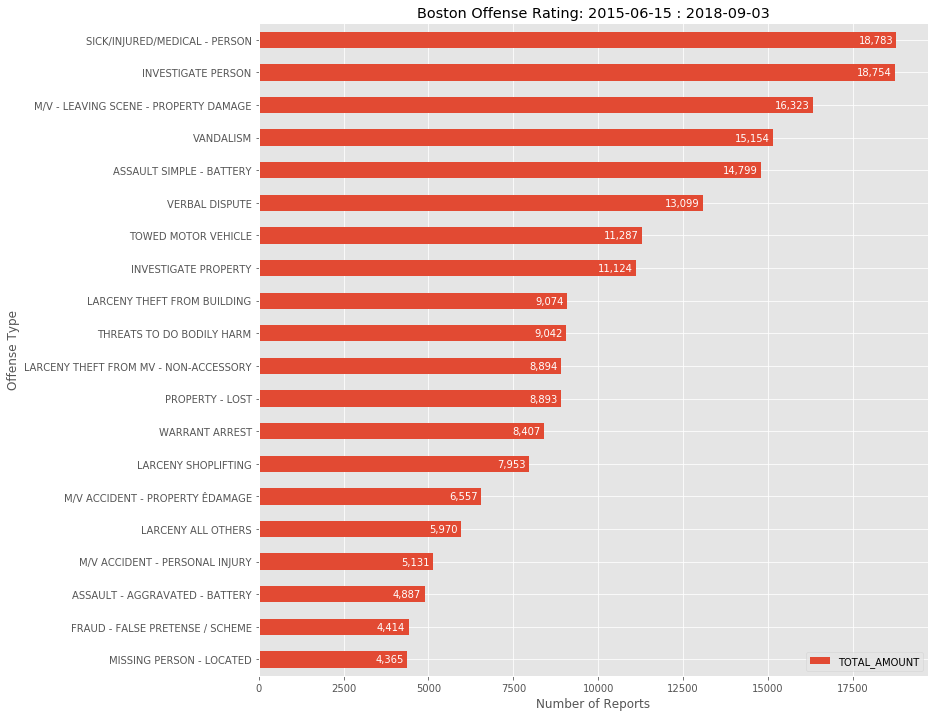

In [12]:
code_tg.head(20).plot(kind = 'barh', x = 'NAME', y = 'TOTAL_AMOUNT', figsize=(12, 12))

plt.gca().invert_yaxis() 

plt.xlabel('Number of Reports')
plt.ylabel('Offense Type')
df.sort_values(['OCCURRED_ON_DATE'], ascending=True, inplace=True)
plt.title('Boston Offense Rating: ' + str(df.OCCURRED_ON_DATE.dt.date.iloc[0]) + ' : ' + str(df.OCCURRED_ON_DATE.dt.date.iloc[-1]))

# This loop automatically add the value of each position to the each bar:
for index, value in enumerate(code_tg.head(20)['TOTAL_AMOUNT']):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 100, index + 0.10), ha='right', color='white')

In addition, I'd also like to know the top reports rating, grouped by OFFENSE_CODE_GROUP.<br>
For this reason we need to make some additional manipulations:

In [13]:
top_gr = code_tg.groupby(['OFFENSE_CODE_GROUP'], as_index=False).sum(axis=1)
top_gr = top_gr[['OFFENSE_CODE_GROUP','TOTAL_AMOUNT']].sort_values(['TOTAL_AMOUNT'], ascending=False).reset_index(drop=True)

In [14]:
top_gr.head(10)

,OFFENSE_CODE_GROUP,TOTAL_AMOUNT
0,Motor Vehicle Accident Response,37132
1,Larceny,25935
2,Medical Assistance,23540
3,Investigate Person,18754
4,Other,18075
5,Drug Violation,16548
6,Simple Assault,15826
7,Vandalism,15415
8,Verbal Disputes,13099
9,Towed,11287


Now let's plot it!

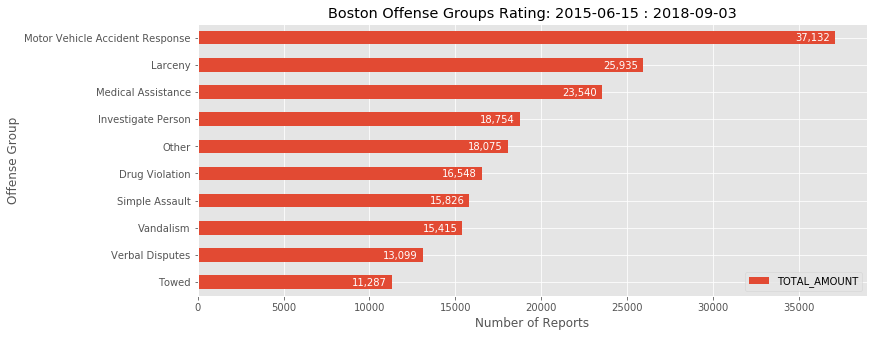

In [15]:
top_gr.head(10).plot(kind = 'barh', x = 'OFFENSE_CODE_GROUP', y = 'TOTAL_AMOUNT', figsize=(12, 5))

plt.gca().invert_yaxis() 

plt.xlabel('Number of Reports')
plt.ylabel('Offense Group')
plt.title('Boston Offense Groups Rating: ' + str(df.OCCURRED_ON_DATE.dt.date.iloc[0]) + ' : ' + str(df.OCCURRED_ON_DATE.dt.date.iloc[-1]))


# This loop automatically add the value of each position to the each bar:
for index, value in enumerate(top_gr.head(10)['TOTAL_AMOUNT']):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 300, index + 0.13), ha='right', color='white')

Here we see a slightly different picture rather than comparing offense names individually. The most-reported here are incidents related to Motor Vehicle Incidents.

<h3>Task2 - Most Shooting Areas</h3>
<br>This part is about the understanding of which boroughs are most dangerous in the meaning of shooting level. The library I used here is <b>folium</b> - it works with maps and coordinates, can combine the close locations into groups and many other things

Firstly, let's extract the rows we are interested in. We need those with a 'Y' shooting mark and the filled district value.

In [16]:
shtng = df[(df.SHOOTING == 'Y') & (df.DISTRICT.notnull())]

After that, we can plot the incidents using folium library:

In [17]:
import folium
import folium.plugins as plugins

latitude = list(shtng.Lat)[1] # This is to initiate the latitude start point for the map
longitude = list(shtng.Long)[1] # This is to initiate the longitude start point for the map

latitudes = list(shtng.Lat) #create the list of all reported latitudes
longitudes = list(shtng.Long) #create the list of all reported longitudes

shooting_map = folium.Map(location = [latitude, longitude], zoom_start = 12) # instantiate a folium.map object

shooting = plugins.MarkerCluster().add_to(shooting_map) # instantiate a mark cluster object for the incidents in the dataframe

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(shtng.Lat, shtng.Long, shtng.DISTRICT):
    if (not np.isnan(lat)) & (not np.isnan(lng)): # also, we check a non-nullness of the coordinates
        folium.Marker(
            location=[lat, lng],
#             icon=None,
            popup=label,
            icon=folium.Icon(icon='exclamation-sign')
        ).add_to(shooting)

# display the map
shooting_map

<b>!NOTE</b><br>
Since GitHub doesn't render complicated folium plots, please use this external link to see the whole project "as it is" on:
<a href="https://nbviewer.jupyter.org/github/ms888ekb/boston/blob/master/Boston_Crimes.ipynb">https://nbviewer.jupyter.org/github/ms888ekb/boston/blob/master/Boston_Crimes.ipynb</a>

After a short time, we can see the map with all reported incidents with the shooting. The most frequently mentioned areas are colored in dark orange. <br>
According to the plot, the most  "dangerous" boroughs are situated in the south part of the city, mainly along the railroad.

Now I want to range the districts to highlight those where I wouldn't recommend settling.

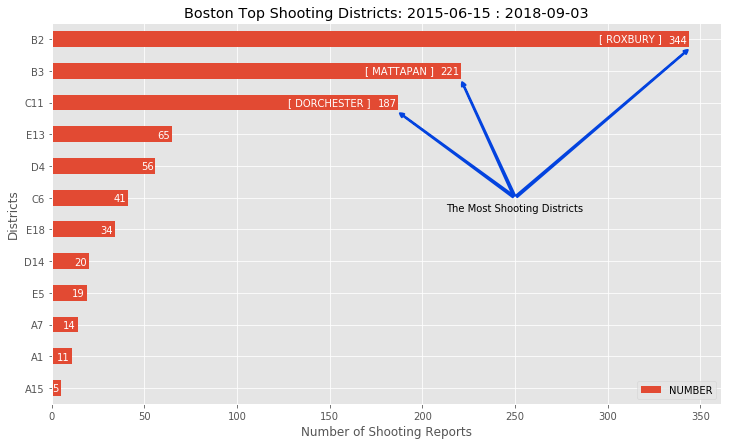

In [18]:
# re-assemble the dataset for the more convenient plotting process
top_sh = shtng.DISTRICT.value_counts().to_frame().reset_index(level=0)
top_sh.columns.values[0] = 'DISTRICT'
top_sh.columns.values[1] = 'NUMBER'
top_sh.plot(kind = 'barh', x = 'DISTRICT', y = 'NUMBER', figsize=(12, 7))

# invert y-axis
plt.gca().invert_yaxis()

# Name axis and title
plt.xlabel('Number of Shooting Reports')
plt.ylabel('Districts')

plt.title('Boston Top Shooting Districts: ' + str(df.OCCURRED_ON_DATE.dt.date.iloc[0]) + ' : ' + str(df.OCCURRED_ON_DATE.dt.date.iloc[-1]))

# Lop for values plotting
for index, value in enumerate(top_sh['NUMBER']):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 1, index + 0.11),
                 ha='right', 
                 color='white'
                )
    
# Loop for arrows plotting. Notice that the arrowhead will always point on the bottom-right bar's corner.
# Also, here I separately defined a starting arrows' point to maximize the procedural plotting 
xy_label = (250,5)
for index, value in enumerate(top_sh['NUMBER']):
    plt.annotate('',
             xy=(value, index + 0.3),
             xytext=xy_label,
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2',
                             connectionstyle='arc3', 
                             color='xkcd:blue', 
                             lw=2
                            )
            )
    if index == 2: # We want to plot only top 3 the most shooting districts, so we need to interrupt the loop here.
        break

# This dictionary I built using googling method.
dict0 = {'C11' : 'DORCHESTER', 'B3' : 'MATTAPAN', 'B2' : 'ROXBURY'} 

# Plot the district name decoding it using our dictionary.
for index, value in enumerate(top_sh['NUMBER']):
    v = top_sh.loc[top_sh['NUMBER']==value]['DISTRICT'].astype('str')
    plt.annotate('[ ' + dict0[v[index]] + ' ]',
             xy=(value - 15, index + 0.13),
             rotation=0,
             va='bottom',
             ha='right',
             color = 'white'
            )
    if index == 2:
        break
        
# Plot the annotation text. Here I used xy_label defined earlier for automation.
plt.annotate('The Most Shooting Districts', # text to display
             xy=(xy_label[0],xy_label[1] + 0.5),
             rotation=0,
             va='bottom',
             ha='center',
            )
        
plt.show()

The figure above clearly shows that Roxbury, Mattapan and Dorchester are the most restless districts.

To finalize with folium library, I'd like to show how else we can depict the incidents using a heat map.<br>
In this case, all shooting incidents are colored depending on the intensity at any particular area. For the time-saving purpose, I limited the number of points to be pictured.

In [19]:
shooting_hmap = folium.Map(location=[df.Lat[100],df.Long[100]], 
                       tiles = "Stamen Toner",
                      zoom_start = 12)

from folium.plugins import HeatMap   

hm = df.loc[:,['Lat','Long','SHOOTING']]
hm.dropna(axis=0, inplace=True)
hlimit = hm.shape[0]
hm = hm.sample(hlimit)
hdata = []
for ln, lt in zip(hm.Lat, hm.Long):
    hdata.append((ln,lt))
HeatMap(hdata, 
        gradient = {0.01: 'blue', 0.15: 'lime', 0.25: 'red'},
        blur = 15,
        radius=5).add_to(shooting_hmap)

shooting_hmap

<b>!NOTE</b><br>
Since GitHub doesn't render complicated folium plots, please use this external link to see the whole project "as it is" on:
<a href="https://nbviewer.jupyter.org/github/ms888ekb/boston/blob/master/Boston_Crimes.ipynb">https://nbviewer.jupyter.org/github/ms888ekb/boston/blob/master/Boston_Crimes.ipynb</a>

<h3>Task3 - Most Dangerous Time in Boston</h3>
<br>To continue the previous chapter, let's consider the question of determining the time of the day when It is better to stay at home. In particular, I want to know, when the chance to catch a bullet is peaked.

Let's prepare the data first: we're interested only in the rows where 'Y' shooting mark is and the 'HOUR' values are filled.

In [20]:
shtngh = df[(df.SHOOTING == 'Y') & (df.HOUR.notnull())]
shtngh.sort_values(['OCCURRED_ON_DATE'], ascending=True, inplace=True)
shtngh.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
318306,I152050036,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2015-06-16 20:41:00,2015-01-01,6,Tuesday,20,Part One,LAWRENCE AVE,42.311611,-71.076256,"(42.31161123, -71.07625600)"
317567,I152050961,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,286,Y,2015-06-19 21:20:00,2015-01-01,6,Friday,21,Part One,KERR WAY,42.333584,-71.085543,"(42.33358389, -71.08554259)"
317367,I152051161,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015-01-01,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317371,I152051161,3125,Warrant Arrests,WARRANT ARREST,B2,238,Y,2015-06-20 00:00:00,2015-01-01,6,Saturday,0,Part Three,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"
317370,I152051161,1503,Firearm Violations,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",B2,238,Y,2015-06-20 00:00:00,2015-01-01,6,Saturday,0,Part Two,DUDLEY ST,42.317808,-71.066850,"(42.31780762, -71.06684990)"


The dataset we need seems to be relatively small, so we will plot all the observations.<br>
This time I use histogram plot, which shows how frequently each particular hour, when the incident with the shooting was reported, appears in the dataset.<br>
I am going to use different kinds of arrows to point the main features.

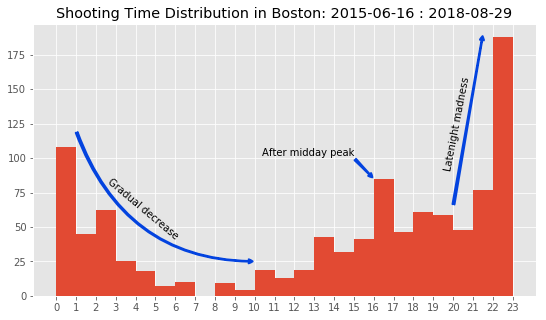

In [21]:
# plot the histogram
plt.figure(figsize=(9, 5))
plt.hist(shtngh.HOUR, bins=range(24))
plt.title('Shooting Time Distribution in Boston: ' + str(shtngh.OCCURRED_ON_DATE.dt.date.iloc[0]) + ' : ' + str(shtngh.OCCURRED_ON_DATE.dt.date.iloc[-1]))
plt.xticks(range(24))

# Decrease Arrow
plt.annotate('',
             xy=(10, 25), # Arrow head
             xytext=(1, 120), # Starting point
             xycoords='data', # Use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2', connectionstyle='angle3, angleA=110,angleB=0', color='xkcd:blue', lw=2)
            ) # Arrow props

# After Midday Arrow
plt.annotate('',
             xy=(16, 85),
             xytext=(15, 100),
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2', connectionstyle='arc3', color='xkcd:blue', lw=2)
            )

# Latenight Madness Arrow
plt.annotate('',
             xy=(21.5, 190),
             xytext=(20, 65),
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2', connectionstyle='arc3', color='xkcd:blue', lw=2)
            )

# Annotate Text
plt.annotate('Gradual decrease ',
             xy=(2.5, 38),
             rotation=-40,
             va='bottom',
             ha='left',
            )

# Annotate Text
plt.annotate('After midday peak', # text to display
             xy=(15, 100),
             rotation=0,
             va='bottom',
             ha='right',
            )

# Annotate Text
plt.annotate('Latenight madness',
             xy=(19.5, 90),
             rotation=79,
             va='bottom',
             ha='left',    
            )

plt.show()

What we can conclude from the histogram is:
1. Nobody shoots at 7 am (too sleepy, probably)
2. There is a midday shooting peak (too hot?)
3. And the late-night madness at midnight (everybody has fun)
4. Then the fun gradually goes down and fades in the early morning.

Well, usually the shooting follows by the verbal disputes. I want to check, is the correlation between these two events or not.<br>
First of all, I want to check it graphically, using the old good histogram.

Let's bultd a dataset we want to examine:

In [22]:
vd = df[(df.OFFENSE_CODE_GROUP == 'Verbal Disputes') & (df.HOUR.notnull())]
vd.sort_values(['OCCURRED_ON_DATE'], ascending=True, inplace=True)
vd.shape

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(13099, 17)

It contains over 13k observations so that our data look statistically significant.

This is how I plot it:

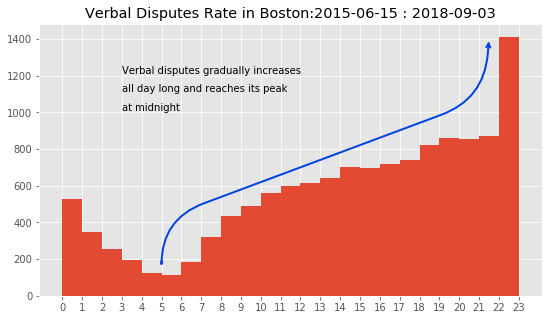

In [23]:
plt.figure(figsize=(9, 5))
plt.hist(vd.HOUR, bins=range(24))
plt.title('Verbal Disputes Rate in Boston:'  + str(vd.OCCURRED_ON_DATE.dt.date.iloc[0]) + ' : ' + str(vd.OCCURRED_ON_DATE.dt.date.iloc[-1]))
plt.xticks(range(24))
plt.annotate('',
             xy=(21.5, 1400),
             xytext=(5, 200),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc, angleA=90, angleB=-95, armA=40, armB=60, rad=45.0', color='xkcd:blue', lw=2)
            )
plt.annotate('Verbal disputes gradually increases', # text to display
             xy=(3, 1200),
             rotation=0,
             va='bottom',
             ha='left',
            )
plt.annotate('all day long and reaches its peak', # text to display
             xy=(3, 1100),
             rotation=0,
             va='bottom',
             ha='left'
            )
plt.annotate('at midnight', # text to display
             xy=(3, 1000),
             rotation=0,
             va='bottom',
             ha='left',
            )
plt.show()

My theory of that incidents with shooting are preceded by verbal disputes is confirmed graphically.<br>But I need more evidence.<br>
Suddenly, I've decided to check whether we could build a prediction model that could predict the probability of the shooting using only OFFENSE_CODE_GROUP features.<br>Then we will see which OFFENSE_CODE_GROUP codes are the most related to incidents with shooting.

Data preparation step:

In [24]:
pred = df.loc[:,['SHOOTING', 'OFFENSE_CODE_GROUP']]
pred.replace(np.nan, 0, inplace=True)
pred.replace('Y', 1, inplace=True)
groups_dummy = pd.get_dummies(pred['OFFENSE_CODE_GROUP'])
pred = pd.concat([pred,groups_dummy], axis=1)
pred.drop(['OFFENSE_CODE_GROUP'], inplace=True, axis=1)

Model Development

I chose the Logistic Regression model since we need to predict the probability of 0 or 1 and it usually suits perfectly for this purpose.

In [25]:
y = pred[['SHOOTING']]
X = pred.iloc[:,1:]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

So, the model is trained. It's time to evaluate it.

In [26]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
# Evaluation using Jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9969286217973831

Outstanding result! Seems like our model fits test data perfectly.

Now let's see the probalility of the classes:

In [28]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.99294184, 0.00705816],
       [0.96148035, 0.03851965],
       [0.99713104, 0.00286896],
       ...,
       [0.99619927, 0.00380073],
       [0.99536618, 0.00463382],
       [0.99397393, 0.00602607]])

Here, <b>predict_proba</b> returns evaluations for all classes, ordered by the label of the classes. <br>
So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[    0   196]
 [    0 63619]]


This is how confusion matrix looks like. All wee need to do here is to measure Log Loss for this model. The lower value, the better model.

In [30]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.017524077278207668

Great result, let's find the importance for the each feature.

Hare are some data manipulations:

In [31]:
feature_importance=pd.concat([pd.DataFrame(X.columns), pd.DataFrame(LR.coef_.T)], axis = 1)
feature_importance.columns = ['features', 'importance']
feature_importance.sort_values(['importance'], ascending=False, inplace=True)
feature_importance = feature_importance.reset_index(drop=True)
feature_importance.head(8)

,features,importance
0,Aggravated Assault,1.839501
1,Homicide,0.891751
2,Firearm Violations,0.467573
3,Ballistics,0.275707
4,Search Warrants,0.163028
5,Warrant Arrests,0.110319
6,HOME INVASION,0.046089
7,Manslaughter,0.009552


What I see here is that there is no place for Verbal Disputes! However, even these outcomes do not exclude the relationship between shooting and verbal disputes reported. They just could follow one after another since they are both in different observations.

<h3>Task4 - The tendency in the incedents with shooting</h3>
<br>Ok, now let's switch to a slightly different question - I want to know how is everything going with the number of shooting incidents - is it increasing or decreasing over the recent years?

For this purpose, we need to transform our data, parse the date column and leave only year-month value because I don't want to plot everyday-dots.

In [32]:
shtng_gr = shtng.loc[:,['OCCURRED_ON_DATE']]
shtng_gr['Amount'] = 1
shtng_gr['Date'] = pd.DatetimeIndex(shtng_gr.OCCURRED_ON_DATE).normalize()
shtng_gr.drop(['OCCURRED_ON_DATE'], axis=1, inplace=True)
shtng_gr['YM'] = pd.to_datetime(shtng_gr["Date"], format='%Y00%m').apply(lambda x: x.strftime('%Y-%m'))
shtng_gr['YM'] = pd.to_datetime(shtng_gr["YM"])
shtng_gr.drop(['Date'], axis=1, inplace=True)
shtng_gr = shtng_gr.groupby(['YM'], as_index=False).sum()
shtng_gr.reset_index(drop=False, inplace=True)
shtng_gr.head()

,index,YM,Amount
0,0,2015-06-01,12
1,1,2015-07-01,41
2,2,2015-08-01,38
3,3,2015-09-01,22
4,4,2015-10-01,15


Now, I want to plot just a regression line to see the trend briefly

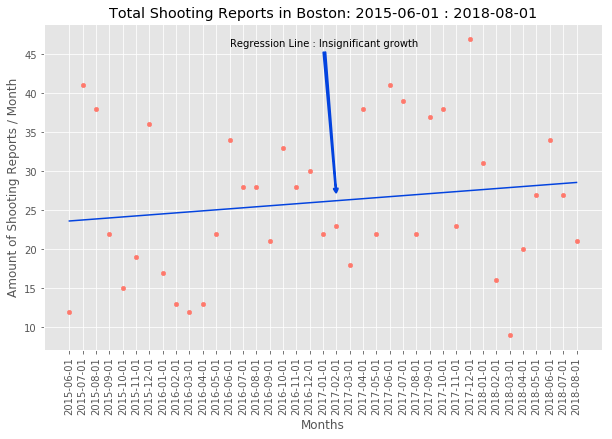

In [33]:
from numpy.polynomial.polynomial import polyfit

b, m = polyfit(shtng_gr.index, shtng_gr.Amount, 1)
shtng_gr.plot(kind='scatter',x='index', y='Amount', rot='90', figsize=(10, 6), alpha = 1, c='xkcd:salmon')
plt.plot(shtng_gr.index, b + m * shtng_gr.index, '-', c='xkcd:blue')
plt.xticks(shtng_gr.index, shtng_gr.YM.dt.date, rotation=90)
plt.ylabel('Amount of Shooting Reports / Month')
plt.xlabel('Months')
plt.title('Total Shooting Reports in Boston: ' + str(shtng_gr.YM.dt.date.iloc[0]) + ' : ' + str(shtng_gr.YM.dt.date.iloc[-1]))

plt.annotate('Regression Line : Insignificant growth',                      # s: str. Will leave it blank for no text
             xy=(20, 27),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(12, 46),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2', connectionstyle='arc3', color='xkcd:blue', lw=2)
            )

plt.show()

Great! Even though the number of shooting reports experiences slow growth, it still seems like a lateral trend.

In comparison to the trend above, I would like to show realy disturbing tendency - the tendency in Medical Assistance reports.

In [34]:
ma = df[(df.OFFENSE_CODE_GROUP == 'Medical Assistance') & (df.OCCURRED_ON_DATE.notnull())]

In [35]:
ma_gr = ma.loc[:,['OCCURRED_ON_DATE']]
ma_gr['Amount'] = 1
ma_gr['Date'] = pd.DatetimeIndex(ma_gr.OCCURRED_ON_DATE).normalize()
ma_gr.drop(['OCCURRED_ON_DATE'], axis=1, inplace=True)
ma_gr['YM'] = pd.to_datetime(ma_gr["Date"], format='%Y00%m').apply(lambda x: x.strftime('%Y-%m'))
ma_gr['YM'] = pd.to_datetime(ma_gr["YM"])
ma_gr.drop(['Date'], axis=1, inplace=True)
ma_gr = ma_gr.groupby(['YM'], as_index=False).sum()
ma_gr.reset_index(drop=False, inplace=True)
ma_gr.head()

,index,YM,Amount
0,0,2015-06-01,226
1,1,2015-07-01,468
2,2,2015-08-01,427
3,3,2015-09-01,498
4,4,2015-10-01,490


To diverse the project, I use a seaborn library here to plot a regression line. From my perspective, it makes it more spectacular and informative.

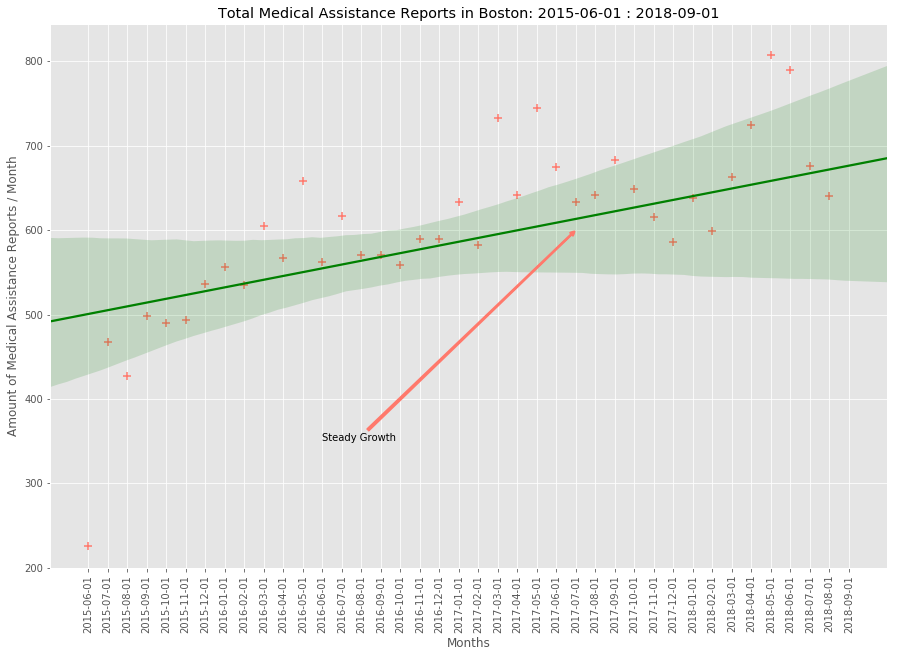

In [36]:
import seaborn as sns
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='index', y='Amount', data=ma_gr, color='green', marker='+', scatter_kws={'s': 50,'color':'xkcd:salmon', 'alpha' : 1})

ax.set(xlabel='Months', ylabel='Amount of Medical Assistance Reports / Month')
ax.set_title('Total Medical Assistance Reports in Boston: ' + str(ma_gr.YM.dt.date.iloc[0]) + ' : ' + str(ma_gr.YM.dt.date.iloc[-1]))
ax.set_ylim(200)
plt.xticks(ma_gr.index, ma_gr.YM.dt.date, rotation=90)

plt.annotate('Steady Growth',
             xy=(25, 600),
             xytext=(12, 350),
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2', connectionstyle='arc3', color='xkcd:salmon', lw=2)
            )


plt.show()

What I see here is a clear uptrend. There is more than a 50% increase in 'the Medical Assistance reports' in just 3 years.
<br>However, to investigate the reasons for this we need other datasets.